In [41]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [42]:
df = pd.read_csv('data1.csv', parse_dates=['Date', 'Time'])

In [43]:
df.head()

,Name,Team,Activity,Distance,Pace,Moving Time,Start,Date,Time
0,Bong Mascardo,Blue,Run,5.00,0:08:02,0:40:10,4:52,2018-04-21,2018-04-21 04:52:00
1,Aguinaldo Catalan,Lavender,Run,4.31,0:10:45,0:46:23,5:20,2018-04-21,2018-04-21 05:20:00
2,Jesse Buban,Green,Bike,29.97,0:18:06,1:36:53,5:25,2018-04-21,2018-04-21 05:25:00
3,Javier Rubis,Yellow,Run,2.49,0:13:06,0:32:44,6:29,2018-04-21,2018-04-21 06:29:00
4,Debbie Anne Borabo,Green,Run,4.89,0:06:11,0:30:15,6:44,2018-04-21,2018-04-21 06:44:00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
Name           79 non-null object
Team           79 non-null object
Activity       79 non-null object
Distance       79 non-null float64
Pace           57 non-null object
Moving Time    28 non-null object
Start          79 non-null object
Date           79 non-null datetime64[ns]
Time           79 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 5.6+ KB


### Total Mileage by Team per Activity

In [45]:
df.groupby(['Activity', 'Team']).sum()

Distance
Activity Team              
Bike     Blue         52.07
         Green       351.80
         Lavender    227.36
         Yellow       20.22
Run      Blue         81.39
         Green       138.08
         Lavender     66.72
         Yellow      133.03

### Run Mileage Ranking

In [46]:
total_run_distance = df[df.Activity == 'Run'].groupby('Team').sum()
total_run_distance = total_run_distance.sort_values(['Distance'], ascending=False).reset_index()
total_run_distance

,Team,Distance
0,Green,138.08
1,Yellow,133.03
2,Blue,81.39
3,Lavender,66.72


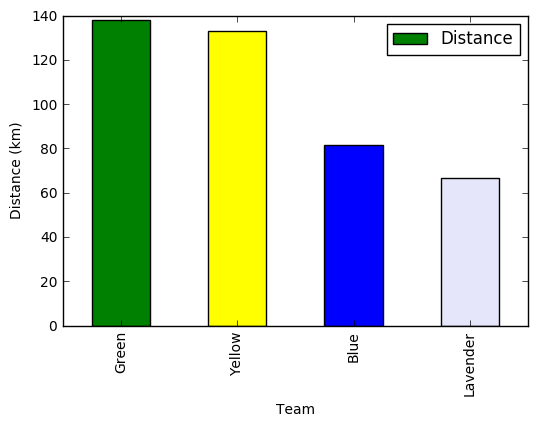

In [47]:
ax = total_run_distance.plot(x='Team', y='Distance', kind='bar', color=total_run_distance['Team'])
ax.set_ylabel('Distance (km)')

### Bike Mileage Ranking

In [48]:
total_bike_distance = df[df.Activity == 'Bike'].groupby('Team').sum()
total_bike_distance = total_bike_distance.sort_values(['Distance'], ascending=False).reset_index()
total_bike_distance

,Team,Distance
0,Green,351.80
1,Lavender,227.36
2,Blue,52.07
3,Yellow,20.22


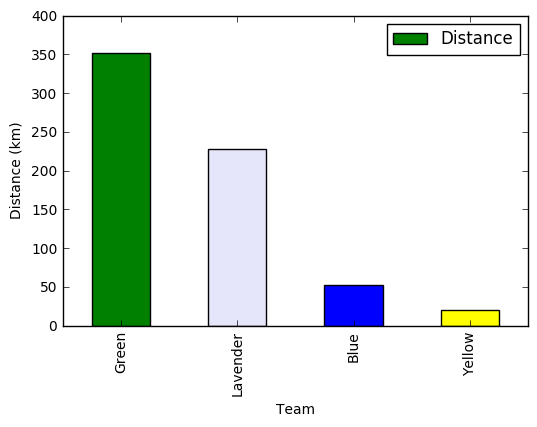

In [49]:
ax = total_bike_distance.plot(x='Team', y='Distance', kind='bar', color=total_bike_distance['Team'])
ax.set_ylabel('Distance (km)')

# Total Mielage Per Activity

In [50]:
df.groupby(['Activity']).sum()

,Distance
Activity,
Bike,651.45
Run,419.22


# Total Mileage (all activity)

In [51]:
df['Distance'].sum()

1070.67

# Total Active Time per Activity

In [52]:
df['Moving Time'] = pd.to_timedelta(df['Moving Time'])

In [53]:
df[['Moving Time', 'Activity']].groupby(['Activity']).sum()

,Moving Time
Activity,
Bike,23:51:09
Run,18:23:44


# Total Active Time

In [54]:
df['Moving Time'].sum()

Timedelta('1 days 18:14:53')

# Unique Participants

In [55]:
df['Name'].unique()

array(['Bong Mascardo', 'Aguinaldo Catalan', 'Jesse Buban', 'Javier Rubis',
       'Debbie Anne Borabo', 'Paolo Digo', 'Lito Hatoc',
       'Dominicano Dela Rosa', 'Charles De Jesus', 'Gerry Gerona',
       'Joy Garcia', 'Maan Carbonel-Caballero', 'Ferdinand Laguilles',
       'Tintin Espartinez', 'Ken Michael Florece', 'Abe Manansala',
       'Fidel See', 'Edgardo Lota', 'Thonz de Veco', 'Cherry Acha',
       'Mel Labao', 'Kenneth Lagamayo', 'Angela Cal Ortiz',
       'Lightgrenadez Temz', 'Ronn Andador', 'AJ Ordonez',
       'Marinelle Freo', 'Jimmy Basaysay', 'Rowena Daep', 'Abegail Gatdula'], dtype=object)

### Number of Unique Participants

In [56]:
len(df['Name'].unique())

30

### Most Active Participant

In [57]:
df['Name'].value_counts()

Lito Hatoc                 6
Ferdinand Laguilles        6
Gerry Gerona               5
Edgardo Lota               5
Paolo Digo                 4
Aguinaldo Catalan          4
Dominicano Dela Rosa       4
Fidel See                  4
Maan Carbonel-Caballero    4
Charles De Jesus           4
Joy Garcia                 3
Tintin Espartinez          3
Bong Mascardo              3
Thonz de Veco              2
Ken Michael Florece        2
Cherry Acha                2
Lightgrenadez Temz         2
Angela Cal Ortiz           2
Abe Manansala              2
Mel Labao                  2
Ronn Andador               1
AJ Ordonez                 1
Marinelle Freo             1
Jesse Buban                1
Rowena Daep                1
Debbie Anne Borabo         1
Kenneth Lagamayo           1
Javier Rubis               1
Abegail Gatdula            1
Jimmy Basaysay             1
Name: Name, dtype: int64

# Longest Bike Ride

In [58]:
df.loc[df.Distance[df.Activity=='Bike'].idxmax()]

Name                    Lito Hatoc
Team                         Green
Activity                      Bike
Distance                     87.82
Pace                       0:16:02
Moving Time        0 days 05:26:05
Start                         5:32
Date           2018-04-21 00:00:00
Time           2018-04-21 05:32:00
Name: 6, dtype: object

# Longest Run

In [59]:
df.loc[df.Distance[df.Activity=='Run'].idxmax()]

Name                    Joy Garcia
Team                         Green
Activity                       Run
Distance                     20.41
Pace                       0:09:15
Moving Time                    NaT
Start                        17:49
Date           2018-04-25 00:00:00
Time           2018-04-25 17:49:00
Name: 63, dtype: object

# Who have total run mileage greater than 'n' km?

In [60]:
n = 10
total_run = df[df.Activity=='Run'].groupby(['Name']).sum()
total_run[total_run.Distance > n].sort_values(['Distance'], ascending=False)

,Distance
Name,
Charles De Jesus,49.40
Ferdinand Laguilles,36.55
Maan Carbonel-Caballero,34.69
Aguinaldo Catalan,32.04
Gerry Gerona,31.39
Joy Garcia,31.05
Bong Mascardo,30.13
Mel Labao,26.15
Fidel See,25.11


# Who have total bike mileage greater than 'n' km?

In [61]:
n = 50
total_run = df[df.Activity=='Bike'].groupby(['Name']).sum()
total_run[total_run.Distance > n].sort_values(['Distance'], ascending=False)

,Distance
Name,
Lito Hatoc,256.95
Edgardo Lota,68.88
Dominicano Dela Rosa,64.88
Ken Michael Florece,63.19
Paolo Digo,52.07
Thonz de Veco,51.38


In [62]:
df[(df['Team']=='Green') & (df['Activity']=='Bike')]

,Name,Team,Activity,Distance,Pace,Moving Time,Start,Date,Time
2,Jesse Buban,Green,Bike,29.97,0:18:06,01:36:53,5:25,2018-04-21,2018-04-21 05:25:00
6,Lito Hatoc,Green,Bike,87.82,0:16:02,05:26:05,5:32,2018-04-21,2018-04-21 05:32:00
7,Dominicano Dela Rosa,Green,Bike,10.42,0:15:05,00:40:20,11:04,2018-04-21,2018-04-21 11:04:00
15,Dominicano Dela Rosa,Green,Bike,54.46,0:15:03,04:06:27,6:01,2018-04-22,2018-04-22 06:01:00
16,Lito Hatoc,Green,Bike,62.74,0:21:09,02:29:08,6:01,2018-04-22,2018-04-22 06:01:00
25,Lito Hatoc,Green,Bike,22.84,0:21:05,01:03:43,5:21,2018-04-23,2018-04-23 05:21:00
35,Lito Hatoc,Green,Bike,28.66,NaN,NaT,0:05:02,2018-04-24,2018-04-24 00:05:00
50,Lito Hatoc,Green,Bike,28.72,NaN,NaT,5:05,2018-04-25,2018-04-25 05:05:00
76,Lito Hatoc,Green,Bike,26.17,NaN,NaT,5:17,2018-04-26,2018-04-26 05:17:00
